In [1560]:
import numpy as np
import pandas as pd
%matplotlib inline 
from matplotlib import pyplot as plt
import seaborn as sns


In [1453]:
housing = pd.read_csv('data/Ames_Housing_Price_Data.csv', index_col=0)
housing = housing.drop_duplicates()
housing.shape

(2579, 81)

In [1584]:
housing = pd.read_csv('data/housing_w_demo_features.csv', index_col=0)
housing = housing.drop_duplicates()
housing.shape

(2529, 94)

In [1562]:
missing_vals = housing.columns[housing.isnull().any()] 

In [1583]:
for column in missing_vals: #inspecting missingness
    print(column)
    print(type(column))
    print(housing[column].value_counts())
    print(housing[column].isna().sum())
    print()

LotFrontage
<class 'str'>
0.0      450
60.0     238
80.0     125
70.0     122
50.0     106
75.0      89
65.0      79
85.0      64
24.0      49
21.0      46
63.0      42
78.0      42
90.0      41
74.0      38
68.0      36
72.0      31
64.0      29
79.0      27
73.0      27
62.0      26
52.0      25
100.0     24
59.0      22
51.0      22
66.0      22
76.0      22
57.0      21
55.0      21
88.0      21
53.0      20
82.0      20
43.0      19
67.0      19
40.0      17
61.0      17
71.0      16
35.0      16
56.0      16
69.0      16
44.0      15
81.0      14
84.0      14
110.0     14
58.0      13
34.0      13
41.0      13
48.0      13
77.0      12
96.0      12
120.0     11
95.0      11
98.0      11
42.0      10
87.0      10
83.0      10
86.0      10
105.0     10
45.0       9
94.0       9
54.0       9
36.0       9
92.0       9
32.0       8
102.0      8
30.0       8
93.0       8
37.0       7
47.0       7
91.0       7
99.0       6
89.0       6
108.0      5
49.0       5
39.0       5
130.0      5

KeyError: 'Alley'

In [1564]:
def ranker(col):
    x = []
    for i in col:
        if i == 'Ex':
            x.append(5)
        elif i == 'Gd':
            x.append(4)
        elif i == 'TA':
            x.append(3)
        elif i == 'Fa':
            x.append(2)
        elif i == 'Po':
            x.append(1)
        else:
            x.append(0)
    return x

In [1585]:
housing['LotFrontage'] = housing['LotFrontage'].fillna(0) 
housing['MasVnrType'] = housing['MasVnrType'].fillna('None') 
housing['MasVnrArea'] = housing['MasVnrArea'].fillna(0) 
housing['GarageCars'] = housing['GarageCars'].fillna(0)
housing['GarageArea'] = housing['GarageArea'].fillna(0)
housing['GarageYrBlt'] = housing['GarageYrBlt'].fillna('None')
housing['GarageFinish'] = housing['GarageFinish'].fillna('None')
housing['GarageType'] = housing['GarageType'].fillna('None')
housing['GarageQual'] = housing['GarageQual'].fillna('None')
housing['GarageCond'] = housing['GarageCond'].fillna('None')
housing['BsmtExposure'] = housing['BsmtExposure'].fillna('None')
housing['BsmtCond'] = housing['BsmtCond'].fillna('None')
housing['BsmtQual'] = housing['BsmtQual'].fillna('None')
housing['BsmtFinType1'] = housing['BsmtFinType1'].fillna('None')
housing['TotalBath'] = housing['FullBath'] + (housing['HalfBath']*.5)
housing['BsmtFullBath'] = housing['BsmtFullBath'].fillna(0)
housing['BsmtFinSF1'] = housing['BsmtFinSF1'].fillna(0)
housing['BsmtFinType2'] = housing['BsmtFinType2'].fillna('Unf')
housing['BsmtUnfSF'] = housing['BsmtUnfSF'].fillna(0) 
housing['TotalBsmtSF'] = housing['TotalBsmtSF'].fillna(0)
housing['FireplaceQu'] = housing['FireplaceQu'].fillna('None')
housing['MSSubClass'] = housing['MSSubClass'].astype(str)

housing['KitchenQual'] = ranker(housing['KitchenQual'])
housing['BsmtQual'] = ranker(housing['BsmtQual'])
housing['ExterQual'] = ranker(housing['ExterQual'])
housing['HeatingQC'] = ranker(housing['HeatingQC'])
housing['GarageQual'] = ranker(housing['GarageQual'])
housing['FireplaceQu'] = ranker(housing['FireplaceQu'])

housing = housing.drop(labels= ['PoolQC', 'MiscFeature', 'Alley', 'Fence','BsmtHalfBath', 'YrSold', 'MoSold',
                               'FullBath','HalfBath', 'Condition2', 'BsmtFinSF2','Electrical', 'Utilities',
                               'RoofStyle', 'RoofMatl','MasVnrArea', 'BsmtCond', 'BsmtExposure', 'BsmtFinType2',
                              'BsmtFinType2',  'Heating', 'GarageYrBlt', 'SaleCondition', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
                             'total', 'white', 'asian', 'black','native_am', 'nhopi', 'other',
                              'bi_racial', 'ScreenPorch', 'ExterCond', 'KitchenAbvGr',
                              '1stFlrSF', '2ndFlrSF', 'GarageCond', 'PoolArea',
                              'Street','PavedDrive','Fireplaces', 'TotRmsAbvGrd','BsmtFullBath',
                             'BsmtHalfBath', 'MiscVal', 'CentralAir', 'Functional', 'HouseStyle',
                              'MasVnrType', 'Exterior1st', 'Exterior2nd', 'Foundation',
                               'hispanic', 'BsmtFinType1', 'OverallQual',
                               'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF','OverallCond',
                               'LowQualFinSF','GarageType', 'GarageCars','GarageFinish','below_poverty_level',
                              'LandContour', 'YearBuilt', 'LandSlope', 'SaleType',
                               'BldgType', 'MSZoning'], axis=1)


#housing.to_csv('final_housing_data_cleaned.csv', index=False) 

In [1586]:
housing = housing[['GrLivArea', 'MSSubClass', 'LotFrontage', 'LotArea', 'LotShape',
       'LotConfig', 'Condition1', 'YearRemodAdd', 'ExterQual', 'is_collegetown',
       'BsmtQual', 'HeatingQC', 'BedroomAbvGr', 'KitchenQual', 'FireplaceQu',
       'GarageArea', 'GarageQual', 'age_18_24','median_hh_income','TotalBath', 'SalePrice', 'PID']]

In [1587]:
solo_cups = housing.loc[housing['is_collegetown'] == 1]
y1 = solo_cups['SalePrice']
solo_cups = solo_cups.drop(labels = ['SalePrice', 'PID'], axis =1)
old_people = housing.loc[housing['is_collegetown'] == 0]
y2 = old_people['SalePrice']
old_people = old_people.drop(labels = ['SalePrice', 'PID','is_collegetown'], axis =1)

In [1409]:
housing.columns

Index(['GrLivArea', 'MSSubClass', 'LotFrontage', 'LotArea', 'LotShape',
       'LotConfig', 'Condition1', 'YearRemodAdd', 'ExterQual', 'BsmtQual',
       'HeatingQC', 'BedroomAbvGr', 'KitchenQual', 'FireplaceQu', 'GarageArea',
       'GarageQual', 'age_18_24', 'median_hh_income', 'TotalBath', 'SalePrice',
       'PID'],
      dtype='object')

In [1457]:
y = housing['SalePrice']
housing = housing.drop(labels = ['SalePrice', 'PID'], axis =1)
X = pd.get_dummies(housing, drop_first=True, dummy_na=True)


In [1588]:
X1 = pd.get_dummies(solo_cups, drop_first=True, dummy_na=True)
X2 = pd.get_dummies(old_people, drop_first=True, dummy_na=True)



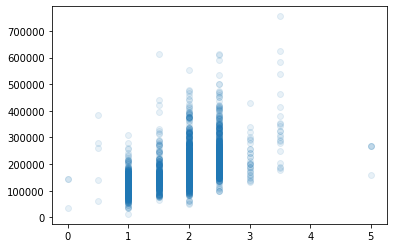

In [66]:
plt.scatter( housing['TotalBath'],housing['SalePrice'], alpha=.1)

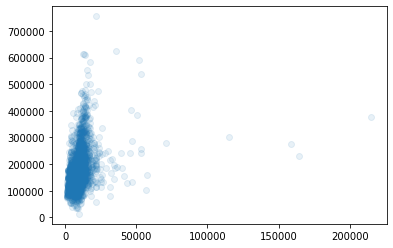

In [236]:
plt.scatter( housing['LotArea'],y, alpha=.1)

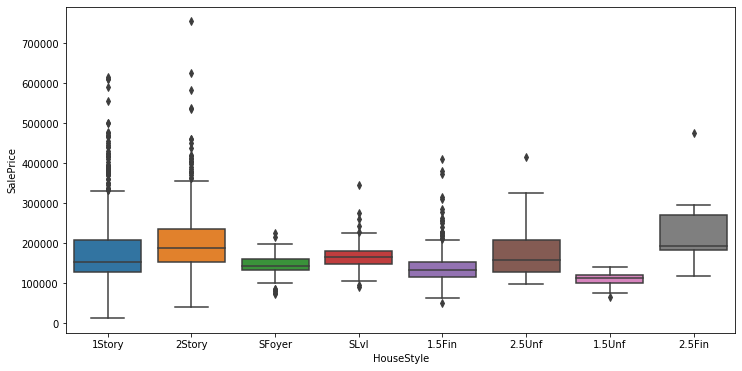

In [237]:
plt.figure(figsize=(12,6))
sns.boxplot(x='HouseStyle', y=y, data=housing)


### Data Analysis Ideas Beyond Basic EDA

**Central Question**: The simple linear model based on **GrLivArea** points to $price/ft^2$ as an important derived target. On the other hand, the fan-like price/square-foot scatterplot implies that different houses have a wide range of $price/ft^2$. We would like to study the major driving factors for these **Ames** homes to have significantly different $price/ft^2$.

No matter which local housing market we inspect, the house prices are the on-going consensus among the home-buyers and 
the home-sellers depending on the supply and demand of the current house market. The house market supply and demand
is influnced by the local labor market/economical condition, job creation, population density, interest rate, price momentum, etc. Among all the area related features (e.g. 1st floor area, 2nd floor area, basement finished area, etc.), do
the local home buyers show some preference towards some features over the others? In other words, are the home buyers
willing to spend an equal amount for one square-foot of 1st floor living space, 2nd floor living space,
deck space, finished basement space, etc.?

Frame your study using **multiple linear regression** and interpret your findings in terms of
the price discounts. Consider the following points:
- Which of the house styles, ranch or colonial, is more popular in terms of the house prices?
- What is the popularity in terms of the housing inventory (based on the available data)?
- Does the house price sensitivity on **2ndFlrSF** depend on the house style (1st story excluded)?
- How is **GrLivArea** engineered from the other area-related feature? If you would design a gross area feature (to replace **GrLivArea**) for the purpose of descriptive modeling, what would you do? What are the pros and cons when aggregating several features together?
- Do home buyers value upstairs bathrooms and basement bathrooms equally? Do they price 'half-bath' as one half of a full bath? Based on your finding, how would you design an aggregate bathroom feature? 
- How much premium were the **Ames** home buyers (back in $2006-2010$) willing to pay for a swimming-pool, an open deck, or an enclosed porch? Did the home buyers value the optional additions based on their sizes?
- How important is a garage in adding value to the houses? How about the differences between an attached vs. detached garage?
- Are there feature combinations which increase the house values? What are the feature combinations which drive the house values down (making the house less desriable)? 
- **House Quality/Condition**: The **Ames** dataset grades each house by the appearance, kitchen, basement, garage, 
    heating, fireplace, .... and finally an overall quality/condition. 
     - How are the overall quality/condition features engineered from the individual quality/condition metrics?
     - How do these metrics' importances affect local house prices?
     - To what extent does the **curb appeal** affect the house prices?
- Does home remodeling add value to the houses? For example, how do the old houses which were remodeled in the 1990s compare to the houses which were built in the 1990s?

In [551]:
housing.groupby('MSZoning').agg({'YearBuilt':['median', 'count']})

YearBuilt      
            median count
MSZoning                
C (all)     1920.0    15
FV          2004.0   113
I (all)     1900.0     1
RH          1955.5    18
RL          1976.0  2000
RM          1937.0   411

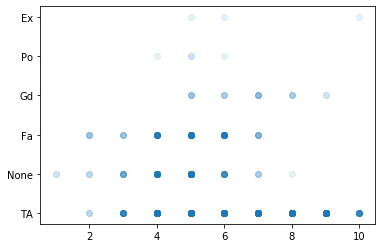

In [536]:
plt.scatter( housing['OverallQual'],housing['GarageQual'], alpha=.1)

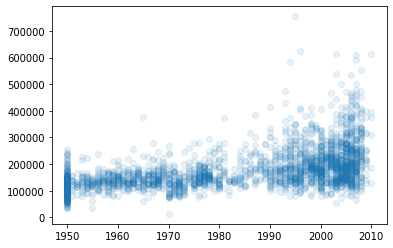

In [256]:
plt.scatter( housing['YearRemodAdd'],housing['SalePrice'], alpha=.1)

In [540]:
housing.columns

Index(['PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning',
       'LotFrontage', 'LotArea', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'Mis

In [542]:
housing['KitchenAbvGr'].value_counts()

1    2451
2     104
0       2
3       1
Name: KitchenAbvGr, dtype: int64

In [545]:
housing.loc[housing['KitchenAbvGr']>0]

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalBath,is_collegetown
0,909176150,856,126000,30,RL,0.0,7890,Pave,Reg,Lvl,...,0,166,0,0,3,2010,WD,Normal,1.0,1
1,905476230,1049,139500,120,RL,42.0,4235,Pave,Reg,Lvl,...,0,0,0,0,2,2009,WD,Normal,2.0,1
2,911128020,1001,124900,30,C (all),60.0,6060,Pave,Reg,Lvl,...,86,0,0,0,11,2007,WD,Normal,1.0,1
3,535377150,1039,114000,70,RL,80.0,8146,Pave,Reg,Lvl,...,0,111,0,0,5,2009,WD,Normal,1.0,0
4,534177230,1665,227000,60,RL,70.0,8400,Pave,Reg,Lvl,...,0,0,0,0,11,2009,WD,Normal,2.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2553,903205040,952,121000,30,RL,0.0,8854,Pave,Reg,Lvl,...,0,40,0,0,5,2009,WD,Normal,1.0,0
2554,905402060,1733,139600,20,RL,0.0,13680,Pave,IR1,Lvl,...,0,0,0,0,6,2009,WD,Normal,2.0,1
2555,909275030,2002,145000,90,RH,82.0,6270,Pave,Reg,HLS,...,0,0,0,0,8,2007,WD,Normal,2.0,1
2556,907192040,1842,217500,60,RL,0.0,8826,Pave,Reg,Lvl,...,0,0,0,0,7,2007,WD,Normal,2.5,0


In [51]:
features = housing[['Neighborhood', 'OverallQual','GrLivArea' ]]
price = housing['SalePrice']
dummy = pd.get_dummies(features.Neighborhood)
dummy.drop('Blmngtn', axis=1, inplace=True) # race 1 is the dominant category
features = features.drop('Neighborhood', axis=1)
features = pd.concat([features, dummy], axis=1)
features.head()

,OverallQual,GrLivArea,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,...,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker
1,6,856,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,5,1049,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,5,1001,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,1039,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5,8,1665,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


(array([   2.,    0.,    7.,  199., 1654.,  649.,   45.,   15.,    5.,
           4.]),
 array([-249906.44800561, -197339.26981894, -144772.09163226,
         -92204.91344559,  -39637.73525892,   12929.44292776,
          65496.62111443,  118063.7993011 ,  170630.97748778,
         223198.15567445,  275765.33386113]),
 <a list of 10 Patch objects>)

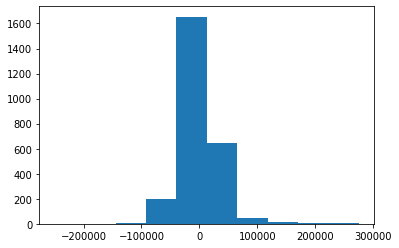

In [52]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(features, price)
residuals = price - lm.predict(features)
plt.hist(residuals)

In [53]:
print('R^2 is equal to %.3f' %(lm.score(features, price)))
print('RSS is equal to %.3f' %(np.sum((price-lm.predict(features))**2)))
print('The intercept is %.3f' %(lm.intercept_))
print('The slopes are %s' %(lm.coef_))

R^2 is equal to 0.805
RSS is equal to 2826928147011.616
The intercept is -37119.745
The slopes are [ 2.10856640e+04  5.85380583e+01 -2.63422238e+04 -4.25588306e+04
 -1.78155865e+04  2.05541870e+04  9.04483537e+03  9.83797085e+03
 -1.28044080e+04 -5.80662007e+03 -5.77748520e+03  8.76546222e+04
 -2.94442488e+04 -2.96644762e+04 -2.15560765e+04  6.90929364e+03
 -5.56149110e+03 -2.76940029e+04 -5.68607539e+03  5.28475111e+04
  6.51454770e+04 -3.02063727e+04 -3.73470312e+04 -1.66606708e+03
 -5.43404229e+03  1.60842264e+04  6.05375887e+04  3.21686549e+04
  3.23329439e+04]


### Neighborhood Analysis

Many home buyers purchase their homes based on their neighborhood preferences and the location. Study the statistics on all the **Ames** neighborhoods, including prices, price/area, lot area, gross living area, built year, the ratios of one-story homes, the lot utility rate (how much of the lot is utilized to build the house), various quality/condition metrics, house styles, etc. Please depict a story of the urban development of **Ames** and relate it to the **Ames** house prices.

To get familiar with the various **Ames** neighborhoods and the ratings of the public schools, visit the map tab of [realtor.com](https://www.realtor.com/realestateandhomes-search/North-Ames_Ames_IA?view=map). While there are many housing info web sites, **realtor.com** uses a neighborhood system which is more compatible with the one used in the dataset. Getting the long-lat coordinates of the $2500$ houses also helps to pin-point the relative geographic locations of the neighborhoods.

Consider the following questions:
- Does the price sensitivity on quality depend on the neighborhood?  
- Given that **Ames** has about $30\%$ poverty rate, and that **ISU** is the largest employer of the city, identify the affluent and poor neighborhoods based on your data analysis and the external information. Identify the neighborhoods which offer a convenient job commute.
- What types of dwelling are popular in **Ames**? How about their popularities in the different neighborhoods?
- **Time Series Analysis**:  
    - During $2006-2010$, does **Ames** housing market show any pricing trend? Is your observation consistent with the fact that the great recession occured in $2008-2009$.
    - How would you describe the price tend of different types of dwellings in terms of time series (hint: pivot/pivot_table)?
    - In the U.S., there are more house-shopping activities during the warmer seasons (spring/summer). What is the seasonality of **Ames** house transactions?

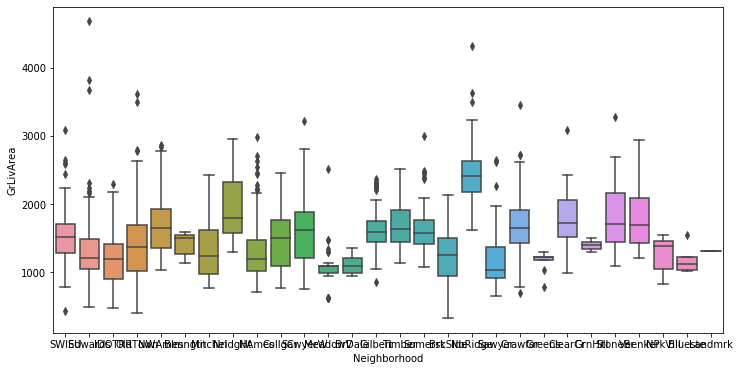

In [55]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Neighborhood', y='GrLivArea', data=housing)

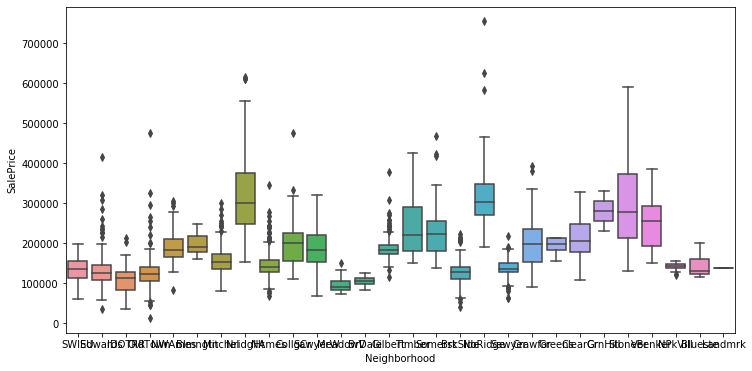

In [318]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Neighborhood', y='SalePrice', data=housing)

In [ ]:
housing.groupby('Neighborhood').agg()

In [1458]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [1382]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)
lm.score(X_train, y_train)

0.8583209232453837

In [1383]:
lm.score(X_test, y_test)

0.8759199695299856

In [1333]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
ridge = Ridge()
lasso = Lasso()
net   = ElasticNet()

In [1590]:
lasso1 = Lasso()
lasso2 = Lasso()
lasso1.set_params(alpha=1, normalize= True)
lasso2.set_params(alpha=1 ,normalize = True)

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [1591]:
lasso1.fit(X1_train, y1_train)
lasso2.fit(X2_train, y2_train)

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [1594]:
solo_cups_coef = pd.DataFrame(lasso1Coef)
old_people_coef = pd.DataFrame(lasso2Coef)
coef_comparisson = solo_cups_coef.merge(old_people_coef, left_index=True, right_on=old_people_coef.index)
coef_comparisson.columns = ['Feature', 'college-age', 'non-college-age']
coef_comparisson.set_index('Feature', inplace=True)

In [1595]:
coef_comparisson

,college-age,non-college-age
Feature,,
GrLivArea,60.003523,96.870388
LotFrontage,-2.966373,123.529569
LotArea,0.896655,0.725783
YearRemodAdd,228.682125,96.425542
ExterQual,20350.129287,18920.780530
BsmtQual,10551.776970,13934.729028
HeatingQC,4863.869596,1594.814199
BedroomAbvGr,-7890.200241,-10830.506837
KitchenQual,3148.515876,12774.897072


In [1417]:
lasso.set_params(alpha=1, normalize=True)

Lasso(alpha=10, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [1592]:

lasso1Coef = pd.Series(lasso1.coef_, index=X1_train.columns)


In [1593]:

lasso2Coef = pd.Series(lasso2.coef_, index=X2_train.columns)


In [1419]:
lassoCoef

GrLivArea               73.476356
LotFrontage             87.581352
LotArea                  0.532783
YearRemodAdd            42.009938
ExterQual            22914.898029
BsmtQual             12334.246144
HeatingQC             1639.509752
BedroomAbvGr         -8390.391421
KitchenQual          13330.851123
FireplaceQu           3561.485947
GarageArea              44.710906
GarageQual           -2092.381750
age_18_24             4431.475401
median_hh_income         0.272839
TotalBath            -2155.878266
MSSubClass_150           0.000000
MSSubClass_160      -10842.054831
MSSubClass_180        -160.355983
MSSubClass_190        -349.819074
MSSubClass_20        17803.874646
MSSubClass_30            0.000000
MSSubClass_40            0.000000
MSSubClass_45         4628.349610
MSSubClass_50           -0.000000
MSSubClass_60         -765.150829
MSSubClass_70        -1026.549465
MSSubClass_75           -0.000000
MSSubClass_80         5445.745432
MSSubClass_85        12214.075704
MSSubClass_90 

In [1420]:
lasso.score(X_test, y_test)

0.8565480692118214

In [1384]:
coefs = []
intercepts = []
R2  = []
alphaRange = np.linspace(1e-3,100,20)
for alpha in alphaRange:
    lasso.set_params(alpha=alpha, normalize = True)  
    lasso.fit(X_train, y_train)
    intercepts.append(lasso.intercept_)
    coefs.append(lasso.coef_)
    R2.append(lasso.score(X_train, y_train))  

In [1386]:
coefs

,GrLivArea,LotFrontage,LotArea,YearRemodAdd,ExterQual,BsmtQual,HeatingQC,BedroomAbvGr,KitchenQual,FireplaceQu,GarageArea,GarageQual,age_18_24,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_nan,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotShape_nan,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LotConfig_nan,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Neighborhood_nan,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition1_nan
0,68.753168,39.399025,0.551227,124.893091,16547.587660,10528.916440,2260.993622,-8211.374443,11877.218730,2482.220741,33.975851,-1705.807957,-13511.066918,0.0,-24099.889226,-2461.656012,15255.908778,33468.603991,18322.540095,15887.53166,24581.430882,15397.60142,14216.961219,13910.626698,23146.579972,28133.360780,34571.040679,16088.781864,0.0,8321.522055,3233.04146,-250.910731,0.0,7097.915418,-6114.022771,9293.827431,193.265102,0.0,15120.727649,22777.705759,-14693.529678,-1205.688681,-9704.651744,11751.863150,-15897.028168,-13983.425988,13974.772374,-23571.052496,-338.322231,-12137.875686,-15443.457782,23013.329863,-11974.494837,39698.320941,38115.320664,-29833.340434,-14853.80631,-13340.502392,-18997.844470,10805.532425,59174.005791,1534.219737,6413.991197,0.0,-4318.133091,7121.089901,30469.562645,4278.884578,-1673.327123,1461.142134,4321.543123,-11749.707779,0.0
1,68.156353,47.310714,0.593312,118.904327,17127.324174,10676.891550,1933.563187,-6825.630993,11808.311788,2573.105117,36.169577,-1538.430637,-10529.189413,0.0,-25730.316321,-2514.115353,-0.000000,20517.202834,2675.359459,0.00000,7176.222317,0.00000,1295.959185,-673.820657,3498.337890,13452.600330,19858.379105,0.000000,0.0,6279.045955,0.00000,-363.276886,0.0,6947.232647,-5586.339228,3862.743966,-0.000000,0.0,12210.281378,21942.208181,0.000000,8098.422149,9.279542,21903.161667,-3733.670735,-1087.612591,9900.641781,-7849.963743,0.000000,-0.000000,-3022.432051,20322.015389,-0.000000,48325.762123,43905.624978,-14751.193668,-897.77211,-416.099696,-7726.112512,16396.764929,61940.231664,10354.464513,12445.033626,0.0,-4285.199876,6074.069647,26550.290765,1534.427704,-844.509815,0.000000,0.000000,-7641.786128,0.0
2,66.896946,44.742613,0.601100,118.528395,17676.098856,10961.522132,1652.115817,-6498.047736,11922.918787,2697.264187,36.645098,-705.065941,-8713.379966,0.0,-22248.251751,-533.891468,-0.000000,18721.757195,0.000000,0.00000,2868.002491,-0.00000,0.000000,-918.043697,0.000000,10546.398539,16365.777004,-0.000000,0.0,4620.351579,0.00000,-708.853564,0.0,6724.179608,-4269.253455,0.000000,-0.000000,0.0,4503.826275,15133.532253,0.000000,6347.080478,0.000000,19883.980722,-2746.370308,-0.000000,3383.019692,-5680.906750,-0.000000,-0.000000,-1947.447312,13901.353495,0.000000,47176.052266,42243.959441,-13155.585056,-0.00000,-0.000000,-6627.738581,13784.805178,59206.762914,8675.773804,9886.154980,0.0,-3727.854769,5696.307072,24606.734052,71.052570,-0.000000,-0.000000,0.000000,-3180.874326,0.0
3,65.672506,40.394964,0.606529,117.962830,18114.943954,11236.341390,1414.906136,-6086.314521,12036.246031,2792.524128,36.942778,-0.000000,-7028.011475,0.0,-18570.378912,-0.000000,-0.000000,17753.894064,0.000000,0.00000,0.000000,-0.00000,0.000000,-280.243902,0.000000,8611.578588,13557.133890,-0.000000,0.0,2920.958425,-0.00000,-976.849708,0.0,6

In [1156]:
pd.set_option('display.max_columns', None)

Text(0.5, 1.0, 'Change of Lasso Slopes Varying Alpha')

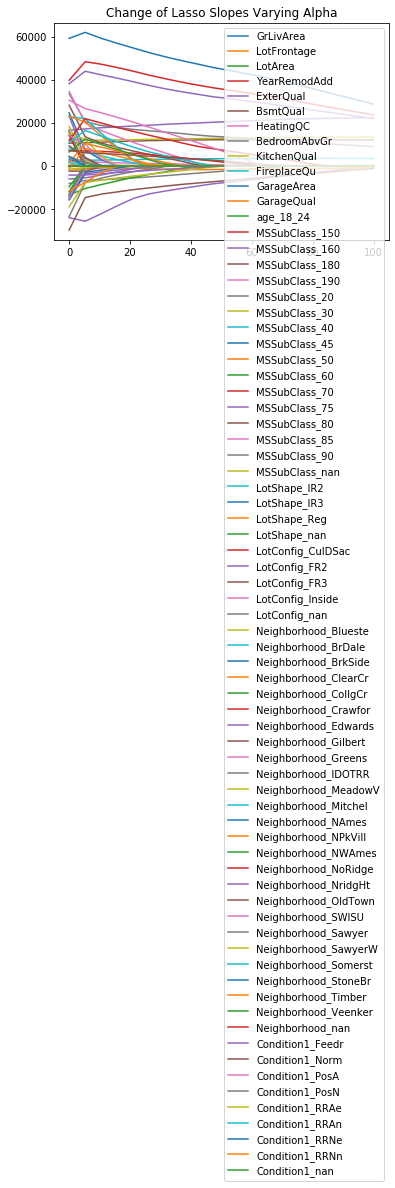

In [1385]:
coefs = pd.DataFrame(np.array(coefs), columns=X.columns)

for name in coefs.columns:
    plt.plot(alphaRange, coefs[name], label=name)
plt.legend(loc=1)    
plt.title('Change of Lasso Slopes Varying Alpha')

In [1288]:
from sklearn.model_selection import cross_val_score

print(np.sqrt(-1* cross_val_score(lasso, X_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs =-1)))


[24297.00432867 26556.19250982 32360.36179486 28123.24328874
 26585.97596397]


In [ ]:
alphaSize  = 40
rhoSize    = 30
alphaRange = np.linspace(1e-2, 10, alphaSize)
rhoRange   = np.linspace(0.01, 1, rhoSize)
trainR2    = np.zeros((alphaSize, rhoSize))
testR2     = np.zeros((alphaSize, rhoSize))
intercepts = np.zeros((alphaSize, rhoSize))
coefs      = np.zeros((alphaSize, rhoSize, 8))

net.set_params(normalize=True)

for alphaIdx, alpha in enumerate(alphaRange):
    for rhoIdx, rho in enumerate(rhoRange):
        net.set_params(alpha=alpha, l1_ratio=rho)
        net.fit(X_train, y_train)
        trainR2[alphaIdx, rhoIdx] = net.score(trainX, trainY)
        testR2[alphaIdx, rhoIdx]  = net.score(testX, testY)
        intercepts[alphaIdx, rhoIdx] = net.intercept_
        coefs[alphaIdx, rhoIdx, :] = net.coef_

In [865]:
# (1)
from sklearn import ensemble
import sklearn.model_selection as ms
randomForest = ensemble.RandomForestRegressor()

randomForest.get_params

<bound method BaseEstimator.get_params of RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)>

In [897]:

# fit RF model on training set
randomForest.set_params(random_state=0)

randomForest.fit(X_train, y_train) 
print(randomForest.score(X_train, y_train))
print("The training error is: %.5f" % (1 - randomForest.score(X_train, y_train)))
print("The test     error is: %.5f" % (1 - randomForest.score(X_test, y_test)))

0.9841131051441376
The training error is: 0.01589
The test     error is: 0.09572


In [898]:
# set the parameter grid
grid_para_forest = {
    'max_depth': range(1, 31),
    'n_estimators': range(10, 110, 10)
}

In [899]:
grid_search_forest = ms.GridSearchCV(randomForest, grid_para_forest, scoring='r2', cv=5, n_jobs=-1)
%time grid_search_forest.fit(X_train, y_train)

CPU times: user 16.8 s, sys: 1.2 s, total: 18 s
Wall time: 11min 58s


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=24,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=90, n_jobs=None,
                                             oob_score=False, random_state=0,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=-1,

In [900]:
# get the best parameters
grid_search_forest.best_params_

{'max_depth': 13, 'n_estimators': 100}

In [901]:
# get the best score
grid_search_forest.best_score_

0.8977194496162493

In [902]:
print('The best score is %.4f' %grid_search_forest.best_score_)
print('The training error is %.4f' %(1 - grid_search_forest.best_estimator_.score(X_train, y_train)))
print('The testing error is %.4f' %(1 - grid_search_forest.best_estimator_.score(X_test, y_test)))

The best score is 0.8977
The training error is 0.0170
The testing error is 0.0968


In [1514]:
randomForest.set_params(max_depth = 13, n_estimators = 100)
randomForest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=13, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [1305]:
from sklearn.model_selection import cross_val_score

print(np.sqrt(-1* cross_val_score(lasso, X_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs =-1)))


[30308.75016206 24773.85054894 27712.79070141 23605.92147994
 25401.9717388 ]


In [1520]:

randomForest.fit(X_train, y_train)

print(randomForest.score(X_train, y_train))
print("The training error is: %.5f" % (1 - randomForest.score(X_train, y_train)))
print("The test     error is: %.5f" % (1 - randomForest.score(X_test, y_test)))

0.9820470772104171
The training error is: 0.01795
The test     error is: 0.10417


In [1521]:
y_test

810    166000
540    180000
762    119000
319    128500
962    210000
        ...  
57     176000
28     200100
11     156500
26     168165
285    214000
Name: SalePrice, Length: 516, dtype: int64

In [1522]:
print("The test     error is: %.5f" % (1 - randomForest.score(X_test, y_test)))

The test     error is: 0.10417


In [1523]:
# feature importance sort
# (3)
feature_importance = list(zip(X.columns, randomForest.feature_importances_))
dtype = [('feature', 'S10'), ('importance', 'float')]
feature_importance = np.array(feature_importance, dtype=dtype)
feature_sort = np.sort(feature_importance, order='importance')[::-1]
[i for (i, j) in feature_sort[0:5]]

[b'OverallQua', b'GrLivArea', b'1stFlrSF', b'TotalBsmtS', b'GarageArea']

<BarContainer object of 10 artists>

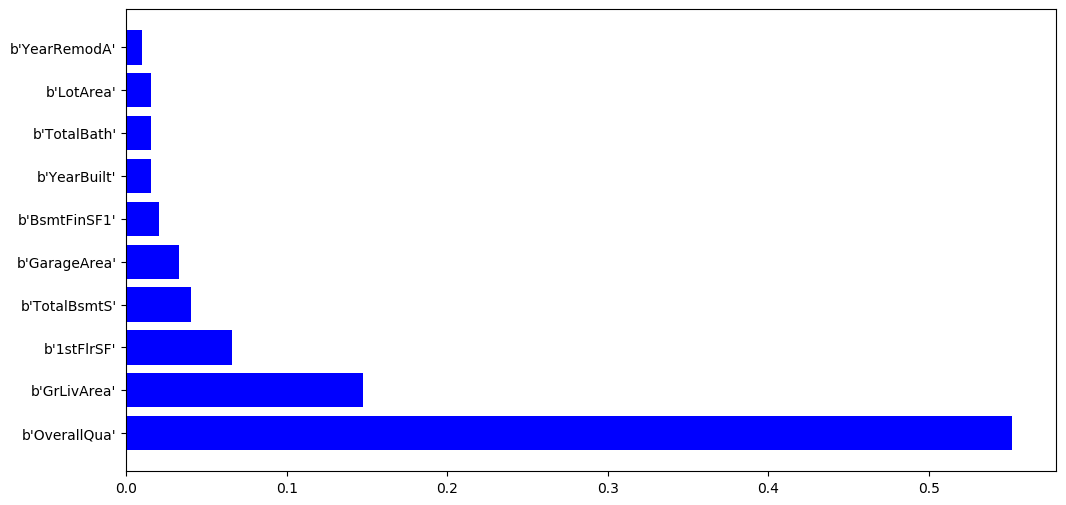

In [1532]:
plt.figure(figsize=(12,6))
plt.style.use('default')
featureNames, featureScores = zip(*list(feature_sort[0:10]))
plt.barh(range(len(featureScores)), featureScores, tick_label=featureNames, color = 'blue')
#plt.title('Feature Importance', fontsize = 30)



In [1473]:
plt.style.available

['seaborn-white',
 'classic',
 'seaborn-poster',
 'dark_background',
 'seaborn',
 'fast',
 'seaborn-pastel',
 'seaborn-dark',
 'seaborn-colorblind',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'seaborn-paper',
 'seaborn-bright',
 'seaborn-muted',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'bmh',
 '_classic_test',
 'seaborn-talk',
 'grayscale',
 'ggplot',
 'seaborn-dark-palette',
 'tableau-colorblind10',
 'seaborn-deep',
 'seaborn-notebook',
 'Solarize_Light2']

### Random Forests on Areas with college kids against areas without college kids

In [1596]:
#solo cups
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)
#old people
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [1597]:
randomForest.set_params(max_depth = 13, n_estimators = 100)
randomForest.fit(X1_train, y1_train)

print(randomForest.score(X1_train, y1_train))
print("The training error is: %.5f" % (1 - randomForest.score(X1_train, y1_train)))
print("The test     error is: %.5f" % (1 - randomForest.score(X1_test, y1_test)))

0.9649254435640366
The training error is: 0.03507
The test     error is: 0.24180


In [1598]:
# feature importance sort
# (3)
feature_importance = list(zip(X1.columns, randomForest.feature_importances_))
dtype = [('feature', 'S10'), ('importance', 'float')]
feature_importance = np.array(feature_importance, dtype=dtype)
feature_sort = np.sort(feature_importance, order='importance')[::-1]
[i for (i, j) in feature_sort[0:5]]

[b'GrLivArea', b'GarageArea', b'LotArea', b'YearRemodA', b'KitchenQua']

<BarContainer object of 10 artists>

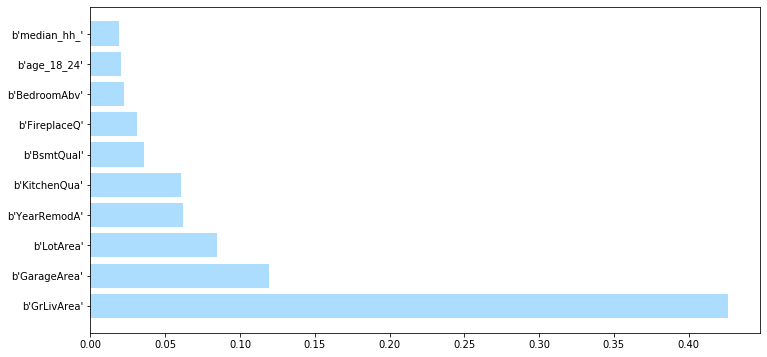

In [1599]:
plt.figure(figsize=(12,6))
plt.style.use('default')
featureNames, featureScores = zip(*list(feature_sort[0:10]))
plt.barh(range(len(featureScores)), featureScores, tick_label=featureNames, color = '#ADDDFE')
#plt.title('Feature Importance', fontsize = 30)





In [1600]:
#randomForest.set_params(max_depth = 25, n_estimators = 100)
randomForest.fit(X2_train, y2_train)

print(randomForest.score(X2_train, y2_train))
print("The training error is: %.5f" % (1 - randomForest.score(X2_train, y2_train)))
print("The test     error is: %.5f" % (1 - randomForest.score(X2_test, y2_test)))

0.9799217917869005
The training error is: 0.02008
The test     error is: 0.12273


In [1601]:
housing['HeatingQC'].value_counts()

5    1276
3     753
4     422
2      77
1       1
Name: HeatingQC, dtype: int64

In [1602]:
# feature importance sort
# (3)
feature_importance = list(zip(X2.columns, randomForest.feature_importances_))
dtype = [('feature', 'S10'), ('importance', 'float')]
feature_importance = np.array(feature_importance, dtype=dtype)
feature_sort = np.sort(feature_importance, order='importance')[::-1]
[i for (i, j) in feature_sort[0:5]]

[b'ExterQual', b'GrLivArea', b'GarageArea', b'BsmtQual', b'LotArea']

<BarContainer object of 10 artists>

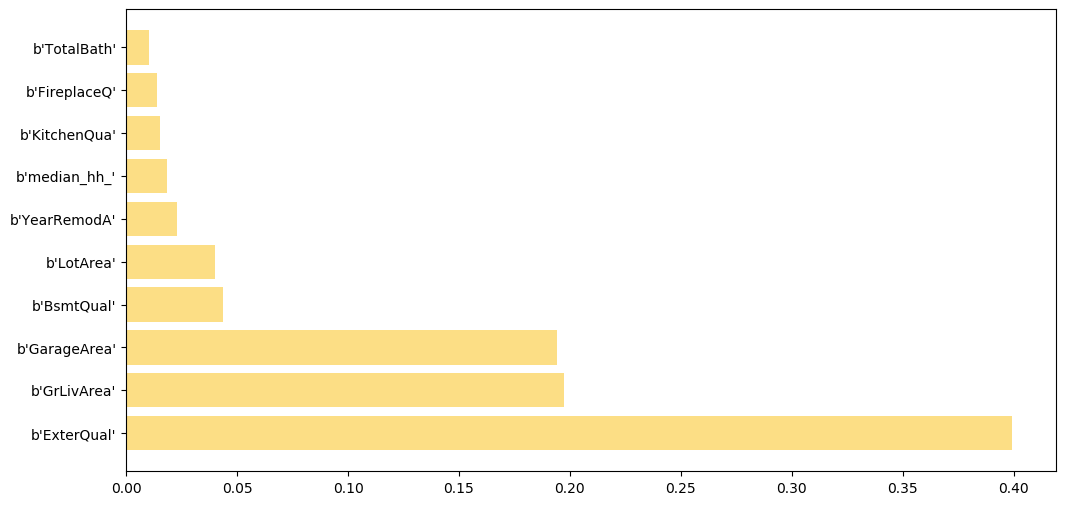

In [1603]:
plt.figure(figsize=(12,6))
plt.style.use('default')
featureNames, featureScores = zip(*list(feature_sort[0:10]))
plt.barh(range(len(featureScores)), featureScores, tick_label=featureNames, color = '#FCDE85')
#plt.title('Feature Importance', fontsize = 30)



In [1251]:
addr_2010.shape

(2558, 2)

In [407]:
addr_2010.head()

,PID,GrLivArea,SalePrice_x,pp_sqft,MSSubClass,MSZoning,LotFrontage,LotArea_x,Street,Alley,...,C25095e26,C25095m26,C25095e27,C25095m27,C25095e28,C25095m28,C25095e29,C25095m29,Shape_Leng,Shape_Area
field_1,,,,,,,,,,,,,,,,,,,,,
29,916386140,1466,201000,137.107776,20,RL,73.0,8925,Pave,NaN,...,180,60,180,60,0,99,0,99,0.299335,0.004125
38,916386010,1346,220000,163.447251,20,RL,88.0,11896,Pave,NaN,...,180,60,180,60,0,99,0,99,0.299335,0.004125
130,916455050,1312,180500,137.576220,20,RL,NaN,6718,Pave,NaN,...,180,60,180,60,0,99,0,99,0.299335,0.004125
143,916455120,1440,232500,161.458333,20,RL,82.0,11202,Pave,NaN,...,180,60,180,60,0,99,0,99,0.299335,0.004125
145,916326090,2279,257000,112.768758,20,RL,149.0,19958,Pave,NaN,...,180,60,180,60,0,99,0,99,0.299335,0.004125


In [457]:
X1_train.shape

(508, 335)

In [519]:
y1.describe()

count       636.000000
mean     157398.545597
std       55162.376428
min       35000.000000
25%      123000.000000
50%      145700.000000
75%      188000.000000
max      415000.000000
Name: SalePrice, dtype: float64

In [520]:
y2.describe()

count      1922.000000
mean     185141.759625
std       79160.812943
min       12789.000000
25%      133000.000000
50%      166000.000000
75%      215000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [1258]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.set_params(learning_rate = 0.2)
gbr.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.2, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [1259]:
gbr.score(X_train, y_train)

0.9576949249530369

In [1260]:
gbr.score(X_test, y_test)

0.9199024473133696

In [1108]:
print(np.sqrt(-1* cross_val_score(gbr, X_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs =-1)))


[36808.62217144 26197.26757791 24901.40333214 22197.13392208
 24989.21190939]


log(y)

In [1422]:
lasso.score(X_test, y_test)

0.8565480692118214

In [1581]:
pd.set_option('display.max_rows', None)